<div style="background-color: #e6f7ff; padding: 15px; border: 2px solid #99ccff; border-radius: 10px;">
    <h2 style="color: #003366; font-family: Verdana, sans-serif;">
        Customer Segmentation: Clustering
    </h2>
    <p style="color: #005580; font-size: 18px; font-family: Verdana, sans-serif;">
        Customer segmentation is a key marketing technique that allows businesses to identify and target specific groups of customers. This project uses K-means clustering to segment customers based on their income, recency of purchases, spending on various products, and purchase behavior.
    </p>
</div>


In [3]:
import pandas as pd

# Load the dataset
file_path = r"marketing_campaign.csv"
data = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows and summary information about the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
 0  5524        1957  Graduation         Single  58138.0        0         0   
 1  2174        1954  Graduation         Single  46344.0        1         1   
 2  4141        1965  Graduation       Together  71613.0        0         0   
 3  6182        1984  Graduation       Together  26646.0        1         0   
 4  5324        1981         PhD        Married  58293.0        1         0   
 
   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
 0  04-09-2012       58       635  ...                  7             0   
 1  08-03-2014       38        11  ...                  5             0   
 2  21-08-2013       26       426  ...                  4             0   
 3  10-02-2014       26        11  ...                  6             0   
 4  19-01-2014       94       173  ...                  5             0   
 
    AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \


## The dataset is now correctly parsed, with the following columns:
        


1. ID: Unique identifier for each customer.
2. Year_Birth: Year of birth of the customer.
3. Education: Education level of the customer.
4. Marital_Status: Marital status of the customer.
5. Income: Annual income of the customer.y
6. Kidhome: Number of children at home.
7. Teenhome: Number of teenagers at home.
8. Dt_Customer: Date of customer's enrollment with the company.
9. Recency: Number of days since the last purchase.
10. MntWines: Amount spent on wine in the last 2 years.
11. MntFruits: Amount spent on fruits in the last 2 years.
12. MntMeatProducts: Amount spent on meat in the last 2 years.
13. MntFishProducts: Amount spent on fish in the last 2 years.
14. MntSweetProducts: Amount spent on sweets in the last 2 years.
15. MntGoldProds: Amount spent on gold products in the last 2 years.
16. NumDealsPurchases: Number of purchases made with a discount.
17. NumWebPurchases: Number of purchases made through the company's website.
18. NumCatalogPurchases: Number of purchases made using a catalog.
19. NumStorePurchases: Number of purchases made directly in stores.
20. NumWebVisitsMonth: Number of visits to the company's website in the last month.
21. AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise.
22. AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise.
23. AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise.
24. AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise.
25. AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise.
26. Complain: 1 if the customer complained in the last 2 years, 0 otherwise.
27. Z_CostContact: Cost per contact (constant).
28. Z_Revenue: Revenue from each customer (constant).
29. Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise.

## Exploring the Data
Let's start with some basic exploration to understand the structure and summary statistics of the data.

1. Summary Statistics
2. Missing Values
3. Distribution of Key Features

Let's perform these steps.
 

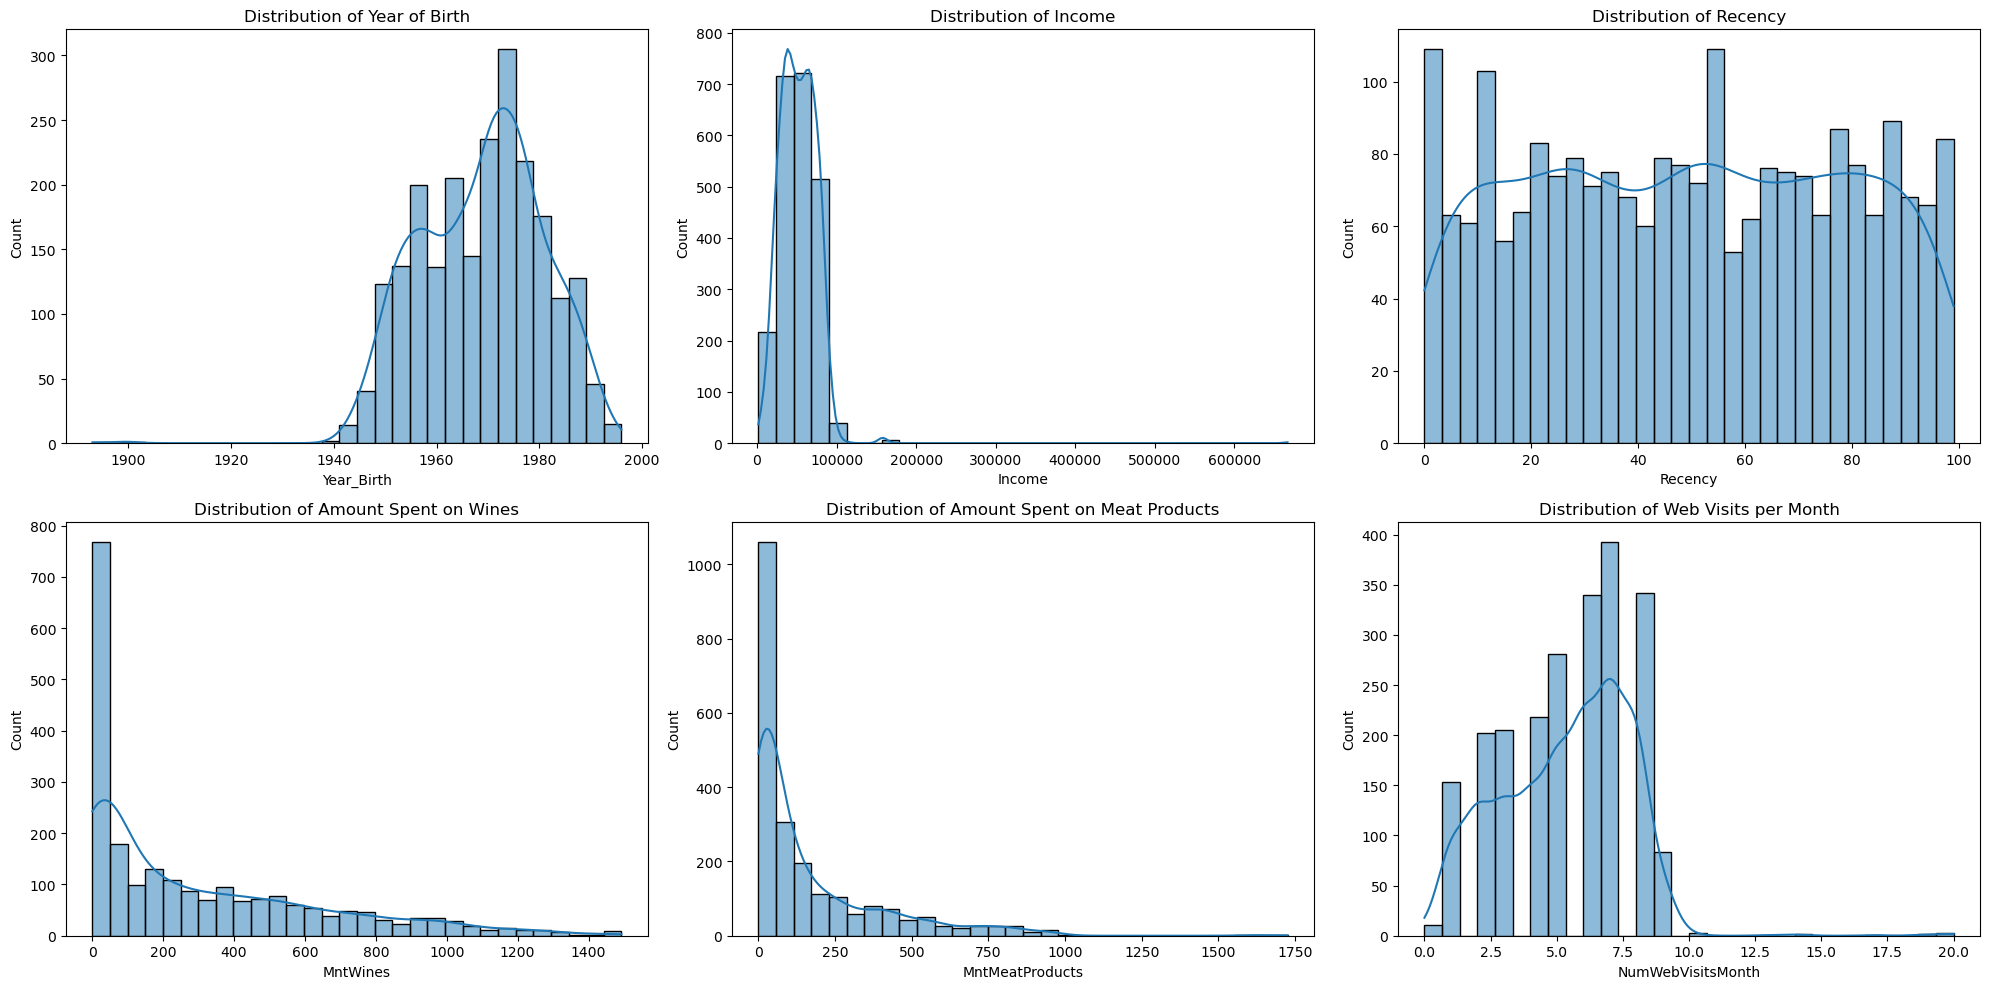

In [4]:
# Summary statistics of the dataset
summary_stats = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

# Visualizing the distribution of key features
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plot distribution of Age
plt.subplot(2, 3, 1)
sns.histplot(data['Year_Birth'], kde=True, bins=30)
plt.title('Distribution of Year of Birth')

# Plot distribution of Income
plt.subplot(2, 3, 2)
sns.histplot(data['Income'].dropna(), kde=True, bins=30)
plt.title('Distribution of Income')

# Plot distribution of Recency
plt.subplot(2, 3, 3)
sns.histplot(data['Recency'], kde=True, bins=30)
plt.title('Distribution of Recency')

# Plot distribution of MntWines
plt.subplot(2, 3, 4)
sns.histplot(data['MntWines'], kde=True, bins=30)
plt.title('Distribution of Amount Spent on Wines')

# Plot distribution of MntMeatProducts
plt.subplot(2, 3, 5)
sns.histplot(data['MntMeatProducts'], kde=True, bins=30)
plt.title('Distribution of Amount Spent on Meat Products')

# Plot distribution of NumWebVisitsMonth
plt.subplot(2, 3, 6)
sns.histplot(data['NumWebVisitsMonth'], kde=True, bins=30)
plt.title('Distribution of Web Visits per Month')

plt.tight_layout()
plt.show()



## Data Exploration Results
        
### Summary Statistics
I have displayed the summary statistics of the dataset for your review. This includes measures such as the mean, standard deviation, minimum, and maximum values for each numerical feature.

### Missing Values
The dataset contains 24 missing values in the Income column. All other columns have complete data.

### Distributions of Key Features
1. Year of Birth: The distribution shows a concentration of customers born between 1950 and 1980.
2. Income: The income distribution is right-skewed, with most customers earning between 20,000 and 80,000.
3. Recency: The recency of purchases shows a fairly even distribution across different values.
4. Amount Spent on Wines: Most customers have spent less than 500 on wines in the last two years, with a long tail of higher spenders.
5. Amount Spent on Meat Products: Similar to wines, most customers have spent less than 500 on meat products, with a few high spenders.
6. Web Visits per Month: Most customers visit the website between 0 and 10 times per month.


## Next Steps: Customer Segmentation Analysis
We'll proceed with customer segmentation using clustering algorithms. Here are the steps we will follow:

1. Data Preprocessing: Handle missing values and normalize the data.
2. Feature Selection: Choose relevant features for segmentation.
3. Clustering with K-Means: Perform K-Means clustering.
4. Cluster Analysis: Analyze the characteristics of each cluster.
5. Visualization: Visualize the clusters and their features.
6. Business Insights: Discuss the business insights derived from the segmentation.

Let's start with data preprocessing and feature selection.
       


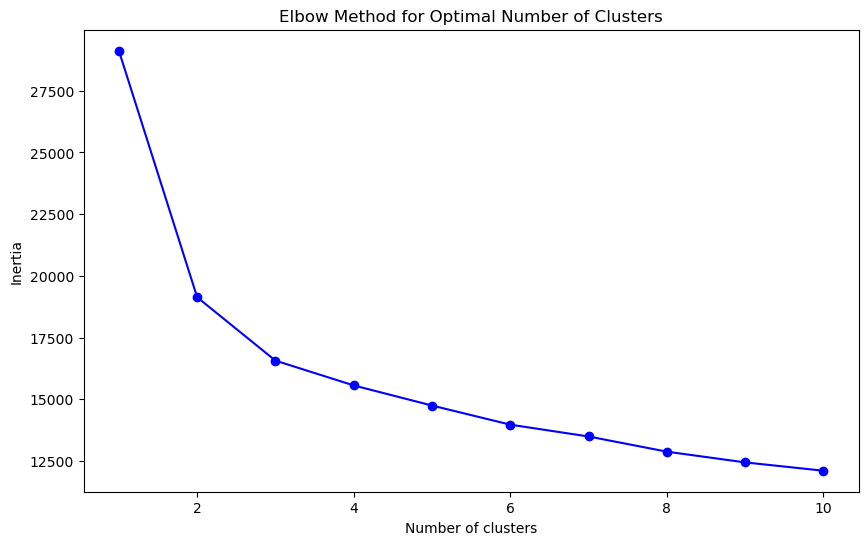

                  ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5419.517672  1965.860707  53956.674130  0.380457  0.875260   
1        5691.923636  1969.356364  75638.740010  0.032727  0.243636   
2        5669.797414  1966.689655  74154.008632  0.068966  0.375000   
3        5611.357843  1971.008824  35169.185556  0.755882  0.462745   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        48.234927  422.582121  15.954262       113.224532        22.029106   
1        48.374545  541.200000  98.363636       462.327273       134.090909   
2        50.105603  620.314655  41.693966       367.612069        63.258621   
3        49.266667   40.096078   4.751961        21.367647         7.092157   

         ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster  ...         

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Handling missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
data['Income'] = imputer.fit_transform(data[['Income']])

# Selecting features for segmentation
features = data[['Income', 'Recency', 'MntWines', 'MntFruits', 
                 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                 'NumStorePurchases', 'NumWebVisitsMonth']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering
from sklearn.cluster import KMeans

# Determine the number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Based on the elbow plot, choose an appropriate number of clusters (e.g., 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyzing the characteristics of each cluster
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)


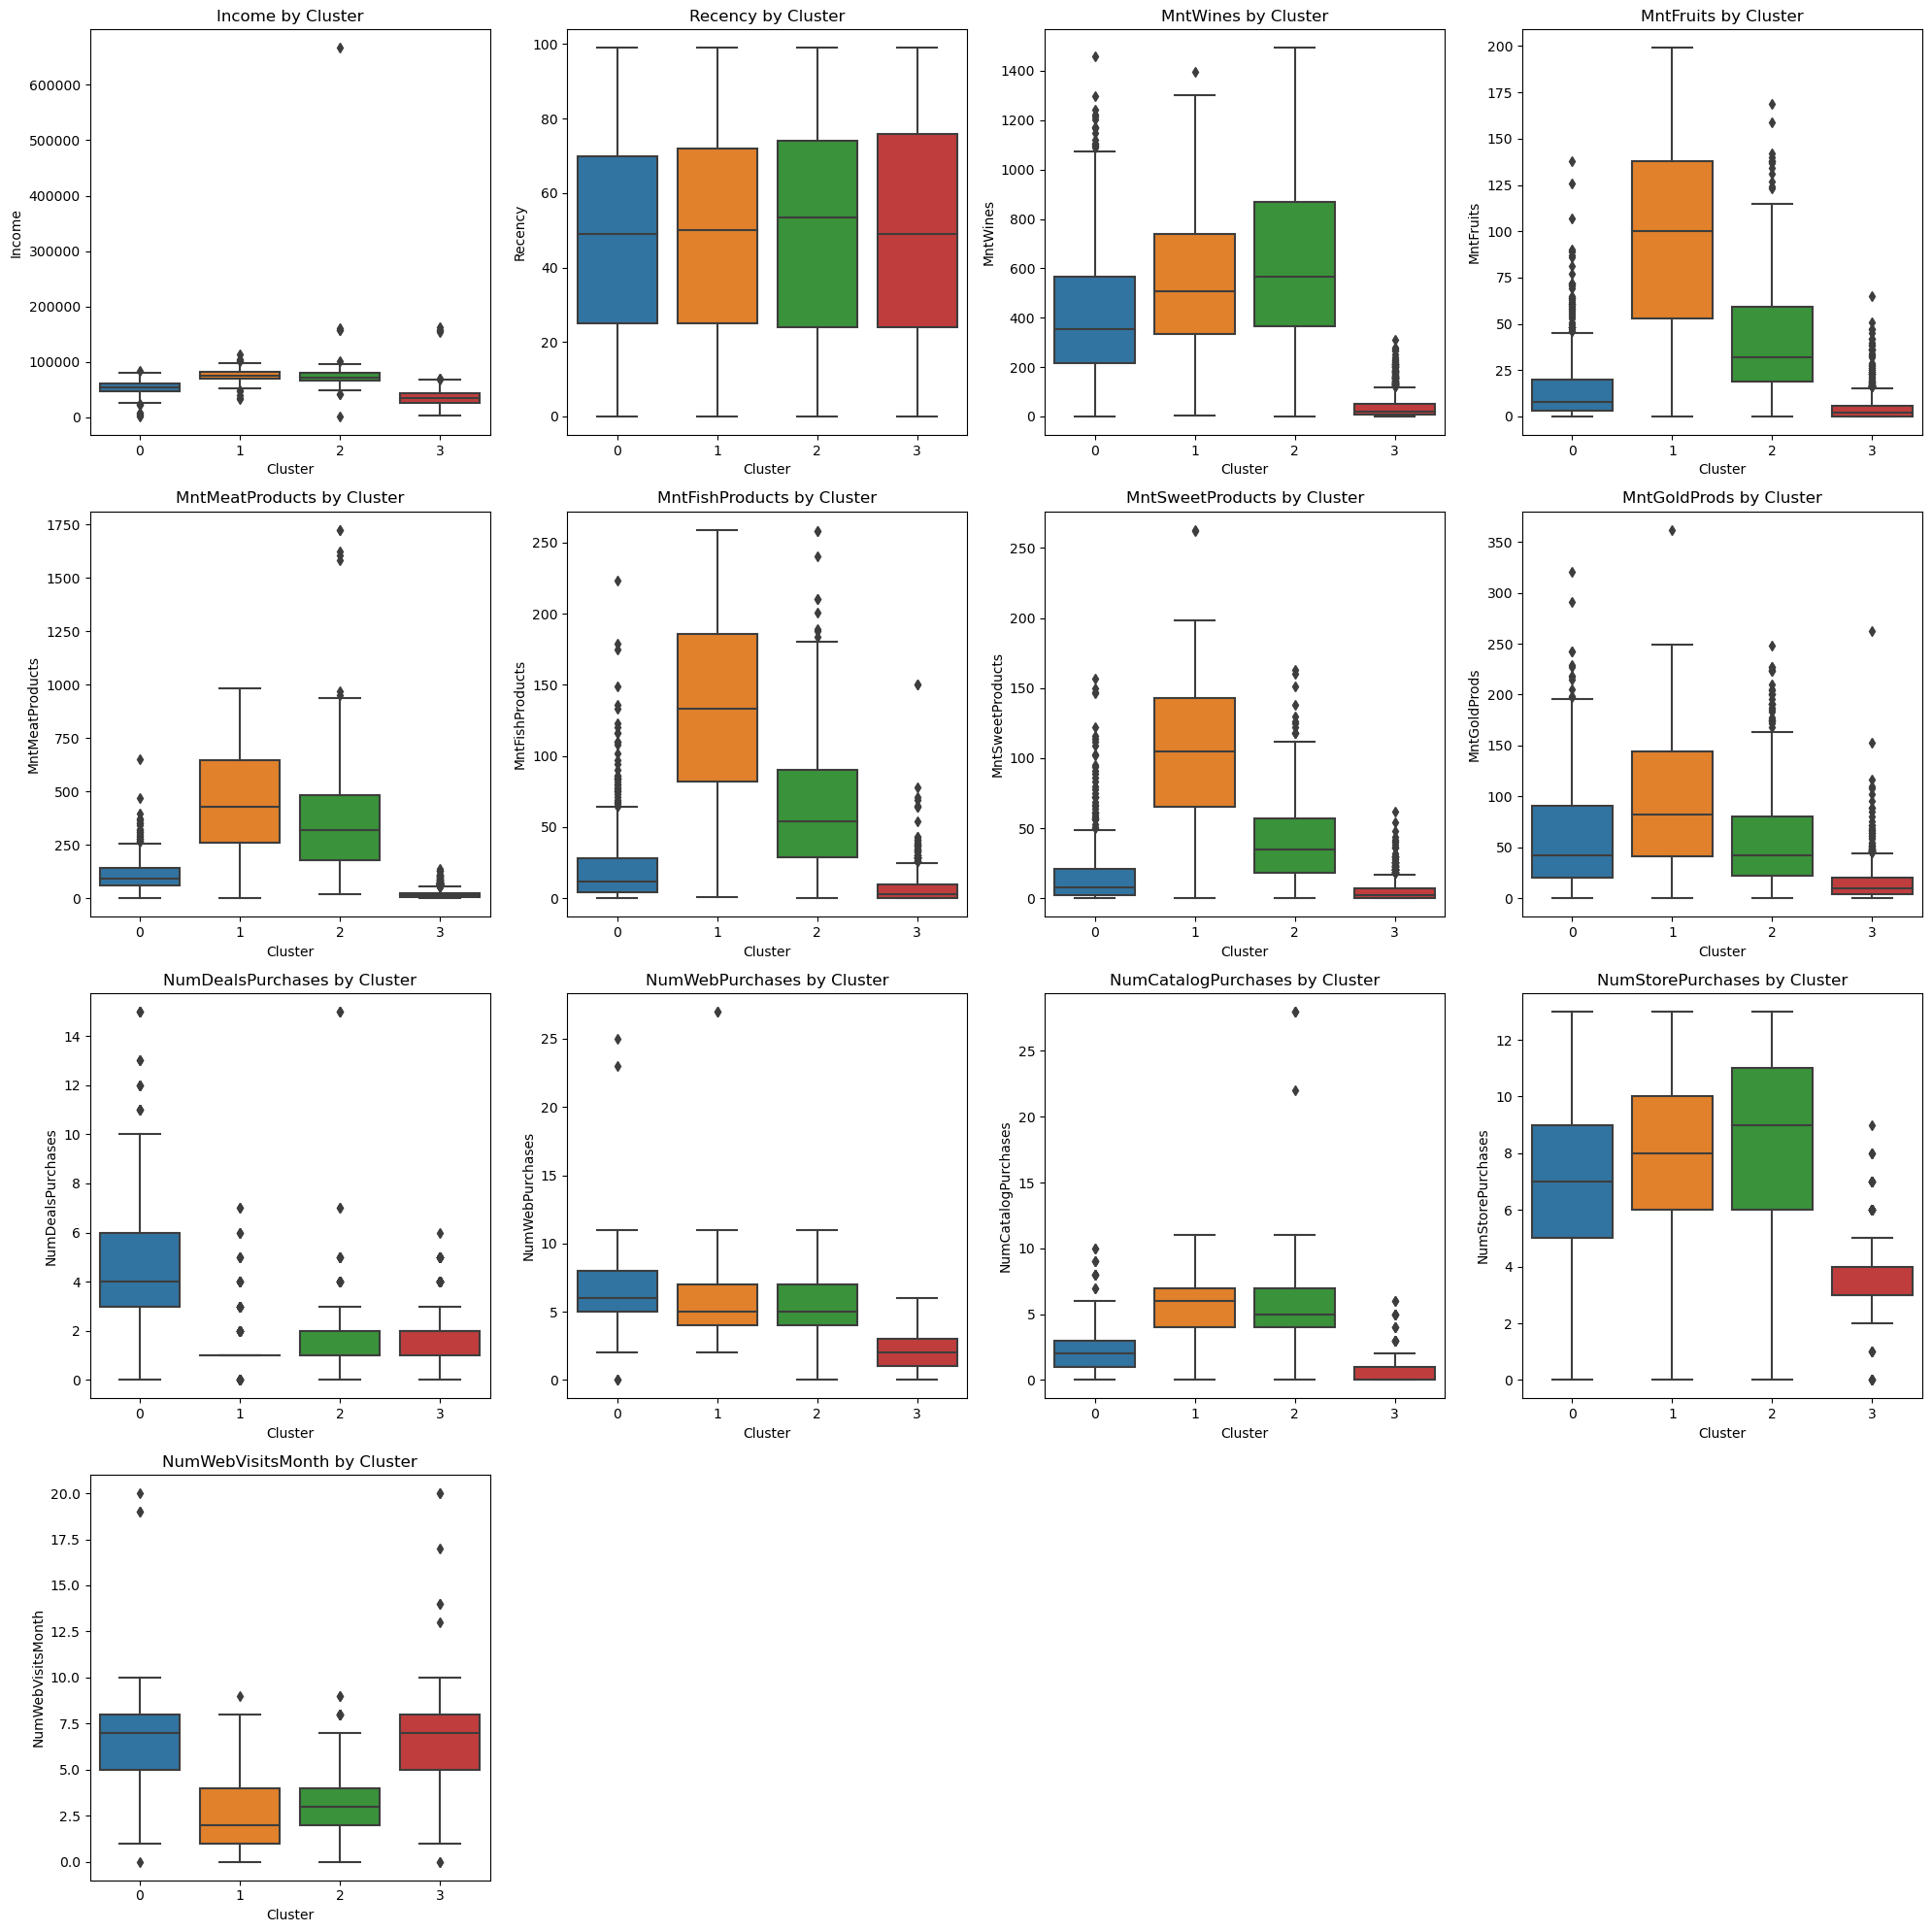

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Setting up the matplotlib figure
plt.figure(figsize=(20, 20))

# Loop through the features and create a boxplot for each
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


# Business Insights from Customer Segmentation
Based on the updated clustering analysis and visualizations, here are the key business insights for each cluster:

### Cluster 0: Moderate to Low Income, Recent Purchasers

Income: Moderate to low income levels.

Recency: Lowest median recency score, indicating the highest probability of recent purchases.

Spending Patterns: Low spending on all categories.

Purchase Behavior: High number of web purchases, frequent web visits, highest deal purchases; moderate store purchases, and low catalog purchases.

## Marketing Strategy:

Focus on Online Deals: Emphasize online deals and discounts.

Engage with Frequent Web Visitors: Utilize retargeting ads and personalized web experiences.

Moderate Store Promotions: Complement online deals with in-store promotions.

Limited Catalog Marketing: Focus less on catalog marketing for this segment.

### Cluster 1: Moderate to High Income, Recent Purchasers

Income: Moderate to high income levels.

Recency: Similar to Cluster 3, with a low median recency score, indicating a high probability of recent purchases.

Spending Patterns: Highest spending on all categories except wine.

Purchase Behavior: Second rank for the number of web purchases, lowest web visits, nearly no deal purchases; second highest store purchases and highest catalog purchases.

## Marketing Strategy:

Focus on Catalog Marketing: Prioritize catalog marketing campaigns.

Store Promotions: Enhance in-store experiences with personalized services and exclusive offers.

Online Engagement: Use targeted online ads and email campaigns to emphasize high-value products.

Minimize Deals: Focus on value and quality rather than discounts.

### Cluster 2: Moderate to High Income, Most Recent Purchasers

Income: Moderate to high income levels, with a wide range but second highest overall.

Recency: Highest median recency score, indicating the lowest probability of recent purchases.

Spending Patterns: Second highest spending on all categories except wine, where they are the highest.

Purchase Behavior: Second to third rank for the number of web purchases, second lowest web visits, and low deal purchases; highest store purchases and second highest catalog purchases.

## Marketing Strategy:

Highlight Premium Products: Emphasize premium products in marketing campaigns.

Store-Centric Promotions: Offer in-store events, exclusive product launches, and personalized shopping experiences.

Enhanced Catalog Marketing: Ensure catalogs are visually appealing with detailed product information.

Targeted Online Ads: Promote premium and exclusive products through targeted online ads.

Limited Deal Offers: Focus more on product quality and exclusivity rather than discounts.

### Cluster 3: Lowest Income, Recent Purchasers

Income: Lowest income levels.

Recency: Similar to Cluster 1, with a low median recency score, indicating a high probability of recent purchases.

Spending Patterns: Lowest spending on all categories.

Purchase Behavior: Lowest number of web purchases, high web visits (similar to Cluster 0), low deal purchases; lowest store and catalog purchases.

## Marketing Strategy:

Focus on Online Engagement: Emphasize engaging and interactive online content to capture their interest.

Affordable Product Range: Highlight affordable products and essential items.

Online Promotions: Utilize retargeting ads and personalized offers to convert web visits into purchases.

Limited In-Store and Catalog Efforts: Focus less on these channels and more on enhancing their online shopping experience.

# Visualization Insights

The visualizations provided valuable insights into the purchasing behavior and demographic characteristics of each cluster. These insights are crucial for developing targeted marketing strategies that resonate with each customer segment.

Income Distribution: Shows how income varies across clusters, helping to tailor product offerings and promotions.

Recency: Indicates how recently customers have made purchases, informing re-engagement strategies.

Spending Patterns: Highlights spending behavior across various product categories, guiding product recommendations and promotions.

Purchase Behavior: Provides insights into the preferred shopping channels for each cluster, enabling cross-channel marketing optimization.

# Conclusion

Customer segmentation allows businesses to tailor their marketing strategies to the specific needs and behaviors of different customer groups. By understanding the characteristics of each segment, companies can craft more personalized and effective marketing campaigns, leading to improved customer satisfaction, loyalty, and overall business performance.
